# Programming for Data Analysis - Project 2

**Ciaran Moran**

***

**Standard imports**

In [206]:
# receiving some user wraning messages, so i found this to prevent them being displayed
# https://stackoverflow.com/questions/9134795/how-to-get-rid-of-specific-warning-messages-in-python-while-keeping-all-other-wa
import warnings
warnings.simplefilter("ignore", category=Warning)

# Imports
import matplotlib.pyplot as plt 
import datetime
import pandas as pd 
import seaborn as sns
import numpy as np
import os

In [207]:
def make_numeric(data):
    data[['hpi']] = data[['hpi']].apply(pd.to_numeric)

### function to strip white spaces from
#### https://stackoverflow.com/questions/13385860/how-can-i-remove-extra-whitespace-from-strings-when-parsing-a-csv-file-in-pandas

In [208]:
# this function took 10 mins 51 seconds to run!
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

#### Below function from 
https://towardsdatascience.com/dealing-with-extra-white-spaces-while-reading-csv-in-pandas-67b0c2b71e6a
#### and modified by me for this project.

In [209]:
def read_csv_strip(data, names, skiprows, encoding, skip_blank_lines, keep_default_na, na_filter, delim_whitespace, date_columns=[]):

    #skiprows=6, encoding='unicode_escape',  skip_blank_lines=True, 
    # keep_default_na=True,na_filter=True)

    # check if the names list has values or empty
    if len(names):
        df = pd.read_csv(data, names=names, skiprows=skiprows, encoding=encoding, \
                     skip_blank_lines=skip_blank_lines, keep_default_na=keep_default_na, \
                        na_filter=na_filter,quotechar='"', delim_whitespace=delim_whitespace, parse_dates=date_columns)
    else :
            df = pd.read_csv(data, skiprows=skiprows, encoding=encoding, \
                     skip_blank_lines=skip_blank_lines, keep_default_na=keep_default_na, \
                        na_filter=na_filter,quotechar='"', parse_dates=date_columns)

    print('Before data clean')
    print(data)
    print(df.dtypes)
    
    df = df.replace({"":np.nan}) # if there remained only empty string "", change to Nan

    # for each column
    for col in df.columns:
        # check if the columns contains string data
        #fi so strip whitespace
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].str.strip()
            #next we'll attempt to convert to numeric
            #is not successful we'll continue as a string.
            try:
                #https://stackoverflow.com/questions/38553946/pandas-read-csv-convert-object-to-float
                df[col] = df[col].apply(pd.to_numeric)
            except Exception:
                print ('>>>>>>>>>ERROR Converting :***',df[col], '*** from ', data,' <<<<<<<<<<<<<<<')
                pass
            #except AttributeError:
            #    # process as a string
            #    df[col] = df[col].str.strip()
    df = df.replace({"":np.nan}) # if there remained only empty string "", change to Nan

    print('AFTER data clean')
    print(data)
    print(df.dtypes)


    return df

## Open the .csv files
#### We can skip the first X rows in the csv as they are not pure data columns
#### Initially received the error "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 33: invalid start byte"
####
#### Looking online I tried various suggestions from 
#### https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s
####
#### The working solution appears to be encoding='unicode_escape'
####
#### The next issue was rows with all Nan values, which may cause issues later on.
#### For this I tried keep_default_na=True,na_filter=True and also skip_blank_lines=True from 
#### https://stackoverflow.com/questions/39297878/how-to-skip-an-unknown-number-of-empty-lines-before-header-on-pandas-read-csv


### Data standardisation

##### File: 41586_2008_BFnature06949_MOESM31_ESM.csv

Here I attempt to standardise the data.

The initial issue is that we have 2 sets of data side by side.

So I extract the data for University of Berlin into a seperate dataframe.

Then I extract the data for LGGE in Grenoble into its own dataframe.

I then rename the column titles to match those of University of Berlin.

Then the dataframes are concatinated together into one dataframe.

The result is a .csv with the data listed in a more consistant order.


In [210]:
# Here we read in 41586_2008_BFnature06949_MOESM31_ESM.csv
#
df=read_csv_strip('data/41586_2008_BFnature06949_MOESM31_ESM.csv', [], 6, 'unicode_escape', \
               True, True, True, False, date_columns=[])

#df = pd.read_csv('data/41586_2008_BFnature06949_MOESM31_ESM.csv', \
#                  skiprows=6, encoding='unicode_escape',  skip_blank_lines=True, \
#                   keep_default_na=True,na_filter=True)

####################
# University of Bern
####################
# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
moesm31_1 = df.iloc[0:247, 0:4] # This will copy columns 0 to 3, for rows 0-246 
#Now add in some constants to standardise the data frame
moesm31_1['station'] = 'moesm31'
moesm31_1['uni'] = 'University of Bern'

# Insert new column in position
moesm31_1.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file

#print('--------------------------')
#print('moesm31_1 - head and tail')
#print('--------------------------')
#print(moesm31_1.head())
#print(moesm31_1.tail())

save_filename = 'data/generated/moesm31_1.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_1.to_csv(save_filename, index=False)

#print(moesm31_1.tail())

###################
# LGGE in Grenoble
###################
moesm31_2 = df.iloc[0:47, 4:7] # This will give you all rows for columns 4 to 6

#print(moesm31_2.head())
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
moesm31_2.rename(columns={'Depth (m).1': 'Depth (m)', 'EDC3_gas_a (yr).1': 'EDC3_gas_a (yr)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)
#print(moesm31_2.head())

#Now add in some constants to standardise the data frame
moesm31_2['sigma (ppmv)'] = '' # this data isn't present
moesm31_2['station'] = 'moesm31'
moesm31_2['uni'] = 'LGGE in Grenoble'

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
moesm31_2.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		
print('--------------------------')
print('moesm31_2 - head and tail')
print('--------------------------')
#print(moesm31_2.head())
#print(moesm31_2.tail())

save_filename = 'data/generated/moesm31_2.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_2.to_csv(save_filename, index=False)




Before data clean
data/41586_2008_BFnature06949_MOESM31_ESM.csv
Depth (m)            float64
EDC3_gas_a (yr)      float64
CO2 (ppmv)           float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
Unnamed: 7           float64
dtype: object
AFTER data clean
data/41586_2008_BFnature06949_MOESM31_ESM.csv
Depth (m)            float64
EDC3_gas_a (yr)      float64
CO2 (ppmv)           float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
Unnamed: 7           float64
dtype: object
--------------------------
moesm31_2 - head and tail
--------------------------


### Now we concatinate both files into one standard format

In [211]:
# We can append (concat) both of the new .csv files  
# Ref: https://www.usepandas.com/csv/append-csv-files
moesm31_combined=pd.concat([moesm31_1, moesm31_2])
# Now add in the source file name, may come in handy later on
moesm31_combined['source file'] = '41586_2008_BFnature06949_MOESM31_ESM.csv'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/moesm31_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_combined.to_csv(save_filename, index=False)

#print(moesm31_combined.head)
#print(moesm31_combined.tail)


### File data/grl52461-sup-0003-supplementary.csv

#### Now we process the larger of the two files.
#### I can re-use some of the code I created for the smaller file.
#### Also the lessons learned and knowledge garnered for the smaller file will be invaluable.

***
##  Read in supplementary file grl52461-sup-0003-supplementary.csv


In [212]:
#
# Here we read in grl52461-sup-0003-supplementary.csv
#
df=read_csv_strip('data/grl52461-sup-0003-supplementary.csv', [], 6, 'unicode_escape', \
               True, True, True, False, date_columns=[])

#df = pd.read_csv('data/grl52461-sup-0003-supplementary.csv', \
#                 skiprows=6, encoding='unicode_escape',  skip_blank_lines=True, keep_default_na=True,na_filter=True)



Before data clean
data/grl52461-sup-0003-supplementary.csv
Depth (m)                                        float64
Gasage (EDC3, yr BP)                             float64
Gasage (AICC2012, yr BP)                         float64
CO2 (ppmv)                                       float64
sigma mean CO2 (ppmv)                            float64
                                                  ...   
analytical sigma mean CO2 (ppmv)                 float64
Correcting Factor (ppmv)                         float64
lower bound (2 sigma) of correction F. (ppmv)    float64
upper bound (2 sigma) of correction F. (ppmv)    float64
Unnamed: 108                                     float64
Length: 109, dtype: object
AFTER data clean
data/grl52461-sup-0003-supplementary.csv
Depth (m)                                        float64
Gasage (EDC3, yr BP)                             float64
Gasage (AICC2012, yr BP)                         float64
CO2 (ppmv)                                       float64
s

***
##  supplementary.csv - Dome C - University of Bern

In [213]:
#########################################
# supplementary.csv - University of Bern
#########################################
row_offset = -7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
print('Processing file grl52461-sup-0003-supplementary.csv...')

station = 'Dome C (0-22 kyr BP)P'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_1 = df.iloc[0:183, 0:5].copy() # This will copy columns 0 to 3, for rows 0-246 
#Now add in some constants to standardise the data frame
suppl_1['station'] = station
suppl_1['uni'] = uni

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
suppl_1.rename(columns={'Gasage (EDC3, yr BP)': 'EDC3_gas_a (yr)', \
                        'sigma mean CO2 (ppmv)': 'sigma (ppmv)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)


if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_1.to_csv(save_filename, index=False)

#print(suppl_1.head())
#print(suppl_1.tail())



Processing file grl52461-sup-0003-supplementary.csv...
save_filename : data/generated/suppl_Dome C (0-22 kyr BP)P_University of Bern.csv


***
## supplementary.csv - Vostok - LGGE Grenoble

In [214]:

#########################################
# supplementary.csv  - Vostok - LGGE Grenoble
#########################################
#
# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Vostok (0-440 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

print('Processing file grl52461-sup-0003-supplementary.csv...')
suppl_2 = df.iloc[0:372, 5:9].copy() 

#Depth (m).1	Gasage (EDC3, yr BP).1	Gasage (AICC2012, yr BP).1	CO2 (ppmv).1
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
suppl_2.rename(columns={'Depth (m).1': 'Depth (m)', 'Gasage (EDC3, yr BP).1': 'Gasage (EDC3, yr BP)', \
                    'Gasage (AICC2012, yr BP).1': 'Gasage (AICC2012, yr BP)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)


#Now add in some constants to standardise the data frame
suppl_2['sigma mean CO2 (ppmv)'] = '0' # add in missing column
suppl_2['station'] = station
suppl_2['uni'] = uni

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_2.to_csv(save_filename, index=False)

#print(suppl_2.head())
#print(suppl_2.tail())



save_filename : data/generated/suppl_Vostok (0-440 kyr BP)_LGGE Grenoble.csv
Processing file grl52461-sup-0003-supplementary.csv...


***
## supplementary.csv - Taylor Dome - University of Bern

In [215]:
#########################################
# supplementary.csv - Taylor Dome - University of Bern
#########################################

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Taylor Dome (19-63 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_3 = df.iloc[0:66-row_offset, 9:13].copy() # This will copy columns from the main .csv file

# Depth (m).2	tentatively synchronized on EDC3 gasage (yr)	CO2 (ppmv).2	sigma mean CO2 (ppmv).1	station	uni
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
suppl_3.rename(columns={'Depth (m).2': 'Depth (m)', \
                        'tentatively synchronized on EDC3 gasage (yr)': 'Gasage (EDC3, yr BP)', \
                                           'CO2 (ppmv).2': 'CO2 (ppmv)' , \
                                            'sigma mean CO2 (ppmv).1': 'sigma mean CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_3['station'] = station
suppl_3['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
suppl_3.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_3.to_csv(save_filename, index=False)

#print(suppl_3.head())
#print(suppl_3.tail())



save_filename : data/generated/suppl_Taylor Dome (19-63 kyr BP)_University of Bern.csv


***
## supplementary.csv - Dome C (393-664 kyr BP) - University of Bern

In [216]:
#########################################
# supplementary.csv - Dome C (393-664 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Dome C (393-664 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_4 = df.iloc[0:329-row_offset, 13:18].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_4.rename(columns={'Depth (m).3': 'Depth (m)', \
                        'Gasage (AICC2012, yr BP).2': 'Gasage (AICC2012, yr BP)', \
                        'Gasage (EDC3, yr BP).2': 'Gasage (EDC3, yr BP)', \
                                           'CO2 (ppmv).3': 'CO2 (ppmv)' , \
                                            'sigma mean CO2 (ppmv).2': 'sigma mean CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_4['station'] = station
suppl_4['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_4.to_csv(save_filename, index=False)

#print(suppl_4.head())
#print(suppl_4.tail())



save_filename : data/generated/suppl_Dome C (393-664 kyr BP)_University of Bern.csv


In [217]:
#########################################
# supplementary.csv - Dome C (393-664 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Dome C (393-664 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_5 = df.iloc[0:38-row_offset, 18:23].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#REQUIRED HEADINGS
#Depth (m)	Gasage (EDC3, yr BP)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma mean CO2 (ppmv)	station	uni


suppl_5.rename(columns={'Depth (m).4': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).3': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).3': 'Gasage (AICC2012, yr BP)', \
                        'CO2 (ppmv).4': 'CO2 (ppmv)' , \
                        'sigma mean CO2 (ppmv).3': 'sigma mean CO2 (ppmv)' }, \
                        inplace=True) 


#Now add in some constants to standardise the data frame
suppl_5['station'] = station
suppl_5['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_5.to_csv(save_filename, index=False)

#print(suppl_5.head())
#print(suppl_5.tail())



save_filename : data/generated/suppl_Dome C (393-664 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - Dome C (611-800 kyr BP) - University of Bern

In [218]:
#########################################
# supplementary.csv - Dome C (611-800 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Dome C (611-800 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_5 = df.iloc[0:258-row_offset, 22:27].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_5.rename(columns={'Depth (m).5': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).4': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).4': 'Gasage (AICC2012, yr BP)', \
                        'sigma mean CO2 (ppmv).3': 'sigma mean CO2 (ppmv)', \
                                           'CO2 (ppmv).5': 'CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_5['station'] = station
suppl_5['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_5.to_csv(save_filename, index=False)

#print(suppl_5.head())
#print(suppl_5.tail())



save_filename : data/generated/suppl_Dome C (611-800 kyr BP)_University of Bern.csv


In [219]:
#########################################
# supplementary.csv - Dome C (611-800 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Dome C (611-800 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_6 = df.iloc[0:54-row_offset, 27:31].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).6	Gasage (EDC3, yr BP).5	Gasage (AICC2012, yr BP).5	CO2 (ppmv).6	

suppl_6.rename(columns={'Depth (m).6': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).5': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).5': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).6': 'CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_6['station'] = station
suppl_6['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_6.to_csv(save_filename, index=False)

#print(suppl_6.head())
#print(suppl_6.tail())



save_filename : data/generated/suppl_Dome C (611-800 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - Talos Dome (35-68 kyr BP) - University of Bern

In [220]:
#########################################
# supplementary.csv - Talos Dome (35-68 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Talos Dome (35-68 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_7 = df.iloc[0:123-row_offset, 31:37].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_7.rename(columns={'Depth (m).7': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).6': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).7': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).4': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_7['station'] = station
suppl_7['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_7.to_csv(save_filename, index=False)

#print(suppl_7.head())
#print(suppl_7.tail())



save_filename : data/generated/suppl_Talos Dome (35-68 kyr BP)_University of Bern.csv


***
## supplementary.csv - EDML (49-115 kyr BP) - University of Bern

In [221]:
#########################################
# supplementary.csv - EDML (49-115 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDML (49-115 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_8 = df.iloc[0:165-row_offset, 37:43].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_8.rename(columns={'Depth (m).8': 'Depth (m)', \
                        'Gasage (EDML1 Sz4, yr BP).1': 'Gasage (EDML1 Sz4, yr BP)', \
                        'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).7': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).8': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).5': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_8['station'] = station
suppl_8['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_8.to_csv(save_filename, index=False)

#print(suppl_8.head())
#print(suppl_8.tail())



save_filename : data/generated/suppl_EDML (49-115 kyr BP)_University of Bern.csv


***
## supplementary.csv - Byrd (19-88 kyr BP) - Oregon State University

In [222]:
#########################################
# supplementary.csv - Byrd (19-88 kyr BP) - Oregon State University
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Byrd (19-88 kyr BP)'
uni = 'Oregon State University'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_9 = df.iloc[0:178-row_offset, 43:48].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_9.rename(columns={'Depth (m).9': 'Depth (m)', \
                        'tentatively synchronized on AICC2012 based on synchronization applied in Bereiter et al. (2012)': \
                            'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).9': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).6': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_9['station'] = station
suppl_9['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_9.to_csv(save_filename, index=False)

#print(suppl_9.head())
#print(suppl_9.tail())



save_filename : data/generated/suppl_Byrd (19-88 kyr BP)_Oregon State University.csv


***
## supplementary.csv - EDC (9-22 kyr BP) - LGGE Grenoble

In [223]:
#########################################
# supplementary.csv - EDC (9-22 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (9-22 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_10 = df.iloc[0:70-row_offset, 48:53].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_10.rename(columns={'Depth (m).10': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).8': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).10': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).7': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_10['station'] = station
suppl_10['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_10.to_csv(save_filename, index=False)

#print(suppl_10.head())
#print(suppl_10.tail())



save_filename : data/generated/suppl_EDC (9-22 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - EDC (125- 153 kyr BP) - LGGE Grenoble

In [224]:
#########################################
# supplementary.csv -  EDC (125- 153 kyr BP)- LGGE Grenoble
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (125- 153 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_11 = df.iloc[0:46-row_offset, 53:58].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_11.rename(columns={'Depth (m).11': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).7': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).9': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).11': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).8': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_11['station'] = station
suppl_11['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_11.to_csv(save_filename, index=False)

#print(suppl_11.head())
#print(suppl_11.tail())



save_filename : data/generated/suppl_EDC (125- 153 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - EDC (12-24 kyr BP) - University of Bern

In [225]:
#########################################
# supplementary.csv - EDC (12-24 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (12-24 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_12 = df.iloc[0:32-row_offset, 58:63].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_12.rename(columns={'Depth (m).12': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).8': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).10': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).12': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).9': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_12['station'] = station
suppl_12['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_12.to_csv(save_filename, index=False)

#print(suppl_12.head())
#print(suppl_12.tail())



save_filename : data/generated/suppl_EDC (12-24 kyr BP)_University of Bern.csv


***
## supplementary.csv - EDC (105-155 kyr BP) - University of Bern

In [226]:
#########################################
# supplementary.csv -  EDC (105-155 kyr BP)- University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (105-155 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_13 = df.iloc[0:77-row_offset, 63:68].copy() # This will copy columns from the main .csv file

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_13.rename(columns={'Depth (m).13': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).9': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).11': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).13': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).10': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_13['station'] = station
suppl_13['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_13.to_csv(save_filename, index=False)

#print(suppl_13.head())
#print(suppl_13.tail())



save_filename : data/generated/suppl_EDC (105-155 kyr BP)_University of Bern.csv


### Now we concatinate all the supplementary files into one standard format

In [227]:
# We can append (concat) all of the new .csv files  
# Ref: https://www.usepandas.com/csv/append-csv-files
suppl_combined=pd.concat([suppl_3,suppl_4,suppl_5,suppl_6,suppl_7,suppl_8,suppl_9,suppl_10,suppl_11,suppl_12,suppl_13])
# Now add in the source file name, may come in handy later on
suppl_combined['source file'] = 'grl52461-sup-0003-supplementary.csv'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/suppl_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_combined.to_csv(save_filename, index=False)
#print(suppl_combined.head)
#print(suppl_combined.tail)

### Process edc3deuttemp2007.txt

In [228]:
####################################
### Process edc3deuttemp2007.txt
####################################

# Refs
# https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
#
# Note,needed to add skipinitialspace=True 
# to get the read_csv to work.
#
edc3deuttemp2007=read_csv_strip('data/edc3deuttemp2007.txt', \
                ['Bag', 'Depth (m)', 'Age', 'Deuterium', 'Temperature'], 92, 'unicode_escape', \
               True, True, True, True,  date_columns=[])

#edc3deuttemp2007 = pd.read_csv('data/edc3deuttemp2007.txt', sep=" ", \
#                   skiprows=92,   \
#                   names=['Bag', 'Depth (m)', 'Age', 'Deuterium', 'Temperature'], \
#                    skip_blank_lines=True, skipinitialspace=True )
#, encoding='unicode_escape',keep_default_na=True,na_filter=True)


#Column 1: Bag number (55 cm sample)
#Column 2: Top depth (m)
#Column 3: EDC3 age scale (years before year 1950)
#Column 4: dD data (per mille with respect to SMOW)
#Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)
#Bag         ztop          Age         Deuterium    Temperature
#Depth (m)	EDC3_gas_a (yr)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma (ppmv)	station	uni	source file

#Now add in some constants to standardise the data frame
edc3deuttemp2007['station'] = 'EPICA Dome C'
edc3deuttemp2007['uni'] = 'NOAA/NCDC'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/edc3deuttemp2007.new.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
edc3deuttemp2007.to_csv(save_filename, index=False)

print(edc3deuttemp2007.head())
print(edc3deuttemp2007.tail())



Before data clean
data/edc3deuttemp2007.txt
Bag              int64
Depth (m)      float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object
AFTER data clean
data/edc3deuttemp2007.txt
Bag              int64
Depth (m)      float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object
   Bag  Depth (m)       Age  Deuterium  Temperature       station        uni
0    1       0.00 -50.00000        NaN          NaN  EPICA Dome C  NOAA/NCDC
1    2       0.55 -43.54769        NaN          NaN  EPICA Dome C  NOAA/NCDC
2    3       1.10 -37.41829        NaN          NaN  EPICA Dome C  NOAA/NCDC
3    4       1.65 -31.61153        NaN          NaN  EPICA Dome C  NOAA/NCDC
4    5       2.20 -24.51395        NaN          NaN  EPICA Dome C  NOAA/NCDC
       Bag  Depth (m)       Age  Deuterium  Temperature       station  \
5795  5796    3187.25  797408.0    -440.20        -8.73  EPICA Dome C   
5796  5797    3187.80  798443.0    -439.00     

### Process epicaDC.deuttemp.EDC3-AICC.csv

In [229]:
####################################
### Process epicaDC.deuttemp.EDC3-AICC.csv
####################################

# Refs
# https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
#
# Note,needed to add skipinitialspace=True 
# to get the read_csv to work.
#
#Depth (m)	EDC3_gas_a (yr)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma (ppmv)	station	uni	source file
#bag	ztop	EDC3béta  	AICC2012	  deutfinal	  temp	  acc-EDC3beta
epicaDCdeuttempEDC3AICC=read_csv_strip('data/edc3deuttemp2007.txt', \
                ['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', \
                 'deutfinal', 'temp', 'acc-EDC3beta'],\
                  92, 'unicode_escape', \
               True, True, True, True, date_columns=[])

#epicaDCdeuttempEDC3AICC = pd.read_csv('data/epicaDC.deuttemp.EDC3-AICC.csv',  \
#                   skiprows=92,   \
#                   names=['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', \
#                          'deutfinal', 'temp', 'acc-EDC3beta'], \
#                   names=['bag', 'ztop', 'EDC3béta', 'AICC2012', 'deutfinal', 'temp', 'acc-EDC3beta'], \
#                    skip_blank_lines=True, skipinitialspace=True )
#, encoding='unicode_escape',keep_default_na=True,na_filter=True)
#                   names=['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Deuterium', 'Temperature'], \

epicaDCdeuttempEDC3AICC.rename(columns={'EDC3béta': 'EDC3_gas_a (yr)', \
                'ztop': 'Depth (m)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)

#Now add in some constants to standardise the data frame
epicaDCdeuttempEDC3AICC['station'] = 'EPICA Dome C'
epicaDCdeuttempEDC3AICC['uni'] = 'NOAA/NCDC'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/epicaDC.deuttemp.EDC3-AICC.csv.new.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
epicaDCdeuttempEDC3AICC.to_csv(save_filename, index=False)

#print(epicaDCdeuttempEDC3AICC.head())
#print(epicaDCdeuttempEDC3AICC.tail())



Before data clean
data/edc3deuttemp2007.txt
Bag                           int64
Depth (m)                   float64
EDC3_gas_a (yr)             float64
Gasage (AICC2012, yr BP)    float64
deutfinal                   float64
temp                        float64
acc-EDC3beta                float64
dtype: object
AFTER data clean
data/edc3deuttemp2007.txt
Bag                           int64
Depth (m)                   float64
EDC3_gas_a (yr)             float64
Gasage (AICC2012, yr BP)    float64
deutfinal                   float64
temp                        float64
acc-EDC3beta                float64
dtype: object


### Now finally combine all files into one

In [230]:
##########################################
# Now finally combine all files into one
##########################################

all_combined=pd.concat([moesm31_combined,suppl_combined, edc3deuttemp2007, epicaDCdeuttempEDC3AICC])
# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/all_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
all_combined.to_csv(save_filename, index=False)
#print(all_combined.head)
#print(all_combined.tail)

***
## Generate the plots

Depth (m)                     float64
EDC3_gas_a (yr)               float64
Gasage (AICC2012, yr BP)       object
CO2 (ppmv)                    float64
sigma (ppmv)                   object
station                        object
uni                            object
source file                    object
Gasage (EDC3, yr BP)          float64
sigma mean CO2 (ppmv)          object
Gasage (TALDICE-1a, yr BP)    float64
Gasage (EDML1 Sz4, yr BP)     float64
Reference                     float64
Age (Ahn et al., 2008)        float64
Bag                           float64
Age                           float64
Deuterium                     float64
Temperature                   float64
deutfinal                     float64
temp                          float64
acc-EDC3beta                  float64
dtype: object
>>>>>>>>>>>>>>>>>>>>>Plotting for:* Depth (m) *<<<<    >>>>* 0       3026.58
1       3030.97
2       3036.44
3       3040.87
4       3043.07
         ...   
5795    3187.25
5796    3187.80

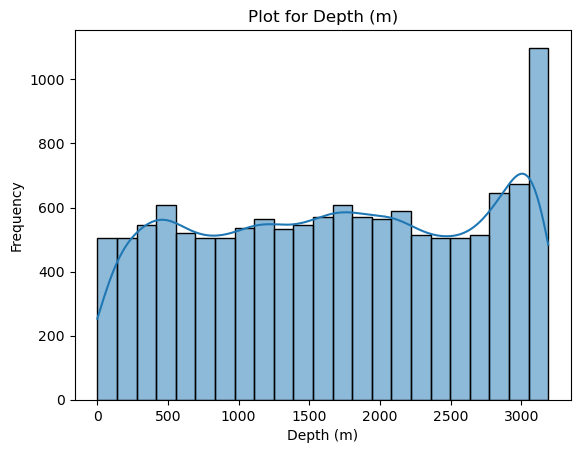

>>>>>>>>>>>>>>>>>>>>>Plotting for:* EDC3_gas_a (yr) *<<<<    >>>>* 0       611269.0
1       616164.0
2       623109.0
3       630183.0
4       635364.0
          ...   
5795    797408.0
5796    798443.0
5797    799501.0
5798    800589.0
5799    801662.0
Name: EDC3_gas_a (yr), Length: 13229, dtype: float64 * <<<<<<<<<<<<<<<<<<<<<<<<


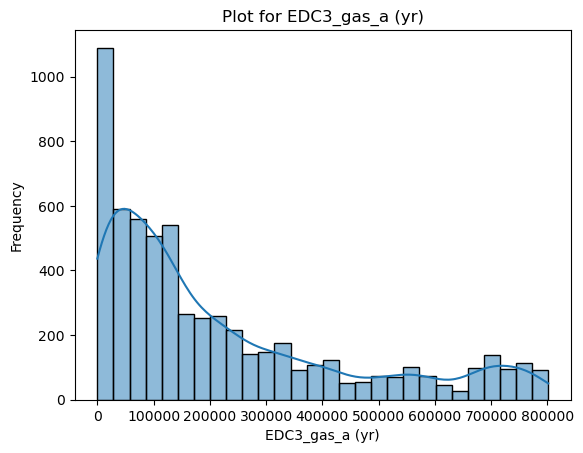

>>>>>>>>>>>>>>>>>>>>>Plotting for:* Gasage (AICC2012, yr BP) *<<<<    >>>>* 0             
1             
2             
3             
4             
         ...  
5795    -440.2
5796    -439.0
5797    -441.1
5798   -441.42
5799    -440.9
Name: Gasage (AICC2012, yr BP), Length: 13229, dtype: object * <<<<<<<<<<<<<<<<<<<<<<<<


TypeError: 'value' must be an instance of str or bytes, not a float

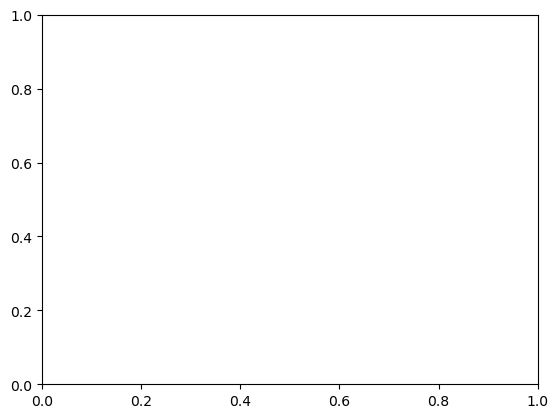

In [231]:
# Build a list of the numerical variables, and then use in a loop.
# ref https://seaborn.pydata.org/generated/seaborn.histplot.html
print(all_combined.dtypes)
#numeric_vars = ['(Depth m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', 'CO2 (ppmv)', 'sigma (ppmv)']

numeric_vars = ['Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', 'CO2 (ppmv)', 'sigma (ppmv)']

#attempt to clean up numerics by removing spaces
#NOTE - new function to do this on the read_csv now used
# ref https://stackoverflow.com/questions/13385860/how-can-i-remove-extra-whitespace-from-strings-when-parsing-a-csv-file-in-pandas
#This method works but is very slow, taking 10 minutes 50 seconds
#table = pd.read_table(save_filename,
#                      names=["(Depth m)", "EDC3_gas_a (yr)", "CO2 (ppmv)", "sigma (ppmv)"],
#                      converters = {'(Depth m)' : strip,
#                                    'EDC3_gas_a (yr)' : strip,
#                                    'CO2 (ppmv)' : strip,
#                                    'sigma (ppmv)' : strip})

# Below code replaced with function
#if pd.api.types.is_string_dtype(df["(Depth m)"]):
#    numeric_vars['(Depth m)'] = numeric_vars['(Depth m)'].str.strip()
#if pd.api.types.is_string_dtype(df["EDC3_gas_a (yr)"]):
#    numeric_vars['EDC3_gas_a (yr)'] = numeric_vars['EDC3_gas_a (yr)'].str.strip()
#if pd.api.types.is_string_dtype(df["CO2 (ppmv)"]):
#    numeric_vars['CO2 (ppmv)'] = numeric_vars['CO2 (ppmv)'].str.strip()
#if pd.api.types.is_string_dtype(df["sigma (ppmv)"]):
#    numeric_vars['sigma (ppmv)'] = numeric_vars['sigma (ppmv)'].str.strip()


for var_name in numeric_vars:
    #kde - If True, compute a kernel density estimate to smooth the distribution and show on the plot as 
    # (one or more) line(s). Only relevant with univariate data.
    # Ref ref https://seaborn.pydata.org/generated/seaborn.histplot.html
    #sns.histplot(df[var_name])

    print('>>>>>>>>>>>>>>>>>>>>>Plotting for:*',var_name,'*<<<<    >>>>*',all_combined[var_name],'* <<<<<<<<<<<<<<<<<<<<<<<<')
    
    sns.histplot(all_combined[var_name], kde=True)
    plt.title(f'Plot for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Frequency')
    plt.show()





In [ ]:
# Display a seaborn plot for each of the string columns
# Build a list of the string variables, and then use in a loop.
# ref https://seaborn.pydata.org/generated/seaborn.histplot.html
string_vars = ['station', 'uni', 'source file']
for var_name in string_vars:
    #kde - If True, compute a kernel density estimate to smooth the distribution and show on the plot as 
    # (one or more) line(s). Only relevant with univariate data.
    # Ref ref https://seaborn.pydata.org/generated/seaborn.histplot.html
    sns.histplot(all_combined[var_name], kde=True)
    plt.title(f'Plot for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Frequency')
    plt.show()



***

## End